# Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Modelos con datos simulados
 * y = a + b.x
 * x: 100 valores distribuidos normal entre 1.5,2.5
 * e: estata distribuido normal 0,0.8
 * y = 6 + 1.3 * x + e

In [2]:
np.random.seed(40322574)

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)
e = 0.5 * np.random.randn(100)
y_predicha = 6 + 1.3*x
y_actual = y_predicha + e

In [4]:
x_list = x.tolist()
y_pred_list = y_predicha.tolist()
y_actual_list = y_actual.tolist()

In [5]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y': y_actual_list,
        'Prediccion': y_pred_list
    }
)

In [6]:
data.head()
y_mean = [np.mean(y_actual) for i in range(1,len(x_list)+1)]

Text(0.5,1,'valor actual versus prediccion')

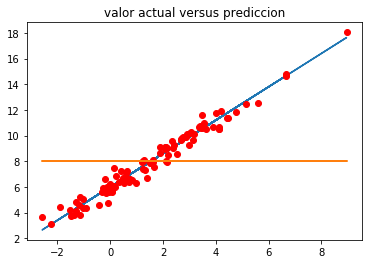

In [7]:
%matplotlib inline
plt.plot(x,y_predicha)
plt.plot(x,y_actual, 'ro')
plt.plot(x,y_mean)
plt.title("valor actual versus prediccion")

In [8]:
data['SSR'] = (data['Prediccion'] - np.mean(y_actual))**2
data['SSD'] = (data['Prediccion'] - data['y'])**2
data['SST'] = (data['y'] - np.mean(data['y']))**2

In [9]:
data.head()

,x,y,Prediccion,SSR,SSD,SST
0,0.206383,6.833371,6.268298,3.153598,0.319308,1.465949
1,3.641106,10.544950,10.733437,7.232345,0.035527,6.254074
2,3.905820,10.657467,11.077567,9.201706,0.176484,6.829501
3,0.414840,7.274489,6.539292,2.264554,0.540515,0.592355
4,1.625208,7.905863,8.112770,0.004711,0.042811,0.019119


In [10]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [11]:
SSR

751.1645477661247

In [12]:
SSD

24.552140867637032

In [13]:
SST

756.7882234324456

In [14]:
R2 = SSR/SST

In [15]:
R2

0.9925690232852533

(array([ 2.,  3.,  4., 15., 23., 13., 21.,  8.,  8.,  3.]),
 array([-1.30766239, -1.05868949, -0.80971659, -0.5607437 , -0.3117708 ,
        -0.0627979 ,  0.186175  ,  0.4351479 ,  0.68412079,  0.93309369,
         1.18206659]),
 <a list of 10 Patch objects>)

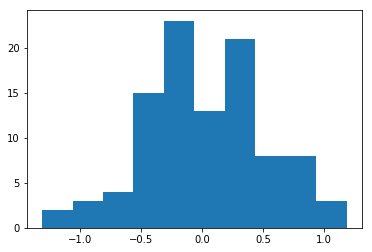

In [16]:
plt.hist(data['Prediccion'] - data['y'])

## Obteniendo los parametros de una regresion lineal
 * b = sum((xi-xm).(yi-ym))/sum((xi-xm)^2)
 * a = ym - b.xm

In [17]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])
x_mean, y_mean

(1.5887870075625177, 8.044135288777158)

In [18]:
data['b_numerador'] = (data['x'] - x_mean) * (data['y'] - y_mean)
data['b_denominador']= (data['x'] - x_mean)**2

In [19]:
b = sum(data['b_numerador'])/sum(data['b_denominador'])
a = y_mean - b*x_mean
a,b

(6.0046122556368005, 1.2836982071431642)

In [20]:
b

1.2836982071431642

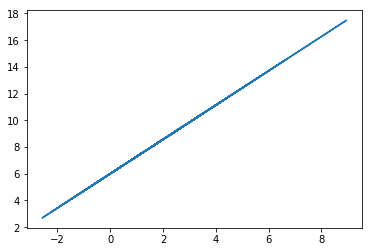

In [21]:
plt.plot(x, (a + b*x))

In [22]:
data['Model'] = a+b*data['x']

In [23]:
data.head()

,x,y,Prediccion,SSR,SSD,SST,b_numerador,b_denominador,Model
0,0.206383,6.833371,6.268298,3.153598,0.319308,1.465949,1.673765,1.911040,6.269546
1,3.641106,10.544950,10.733437,7.232345,0.035527,6.254074,5.132468,4.212011,10.678693
2,3.905820,10.657467,11.077567,9.201706,0.176484,6.829501,6.055176,5.368644,11.018507
3,0.414840,7.274489,6.539292,2.264554,0.540515,0.592355,0.903524,1.378152,6.537141
4,1.625208,7.905863,8.112770,0.004711,0.042811,0.019119,-0.005036,0.001326,8.090889


Text(0.5,1,'valor actual versus prediccion')

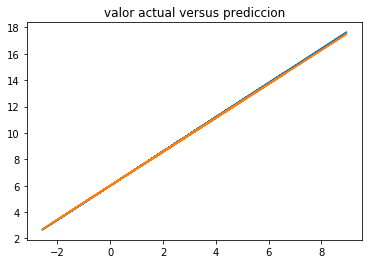

In [24]:
%matplotlib inline
plt.plot(x,y_predicha)
#plt.plot(x,y_actual, 'ro')
plt.plot(data['x'],data['Model'])
plt.title("valor actual versus prediccion")

## Estadisticos basicos para estimacion de parametros

In [29]:
RSE = np.sqrt(sum((data['Model'] - data['Prediccion'])**2)/(100-2))
RSE

0.04083676210894707